# **Rooth Growth Crop Recommendations**

---
## Importing all Libraries
- pandas 
- numpy
- seaborn
- matplotlib
- sklearn 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

# **Import DataSet**

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

In [3]:
crop.head()

,Nitrogen,P (Phosphorous),K (Potassium),Temoerature,Humidity,ph,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Label Encoded
### Label encoding converts categorical data into numerical values for compatibility with machine learning algorithms.

In [4]:
categorical_columns = crop.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    crop[column + '_encoded'] = label_encoder.fit_transform(crop[column]).astype(float)
crop.head()

,Nitrogen,P (Phosphorous),K (Potassium),Temoerature,Humidity,ph,Rainfall,Label,Label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20.0


In [5]:
crop1 = crop.drop('Label', axis=1)
crop1.head(10)

,Nitrogen,P (Phosphorous),K (Potassium),Temoerature,Humidity,ph,Rainfall,Label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20.0
5,69,37,42,23.058049,83.370118,7.073454,251.055000,20.0
6,69,55,38,22.708838,82.639414,5.700806,271.324860,20.0
7,94,53,40,20.277744,82.894086,5.718627,241.974195,20.0
8,89,54,38,24.515881,83.535216,6.685346,230.446236,20.0
9,68,58,38,23.223974,83.033227,6.336254,221.209196,20.0


In [6]:
crop1

,Nitrogen,P (Phosphorous),K (Potassium),Temoerature,Humidity,ph,Rainfall,Label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20.0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5.0


### Check Data Count

In [7]:
crop1.shape

(2200, 8)

In [8]:
crop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nitrogen         2200 non-null   int64  
 1   P (Phosphorous)  2200 non-null   int64  
 2   K (Potassium)    2200 non-null   int64  
 3   Temoerature      2200 non-null   float64
 4   Humidity         2200 non-null   float64
 5   ph               2200 non-null   float64
 6   Rainfall         2200 non-null   float64
 7   Label_encoded    2200 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 137.6 KB


In [9]:
crop1.isnull().sum()

Nitrogen           0
P (Phosphorous)    0
K (Potassium)      0
Temoerature        0
Humidity           0
ph                 0
Rainfall           0
Label_encoded      0
dtype: int64

In [10]:
crop1.duplicated().sum()

np.int64(0)

In [11]:
crop1.describe()

,Nitrogen,P (Phosphorous),K (Potassium),Temoerature,Humidity,ph,Rainfall,Label_encoded
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


In [12]:
crop1.corr()

,Nitrogen,P (Phosphorous),K (Potassium),Temoerature,Humidity,ph,Rainfall,Label_encoded
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P (Phosphorous),-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K (Potassium),-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
Temoerature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
Label_encoded,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


# Data Analysis 
- Heatmap: We use heatmaps to visualize data by representing values as colors in a matrix, making it easy to identify patterns, trends, and areas of high or low concentration at a glance.
- Histograms: It can be used to visualize the distribution of numerical data. 1  They help us understand how frequently different values occur within a dataset, revealing patterns, trends, and outliers

<Axes: >

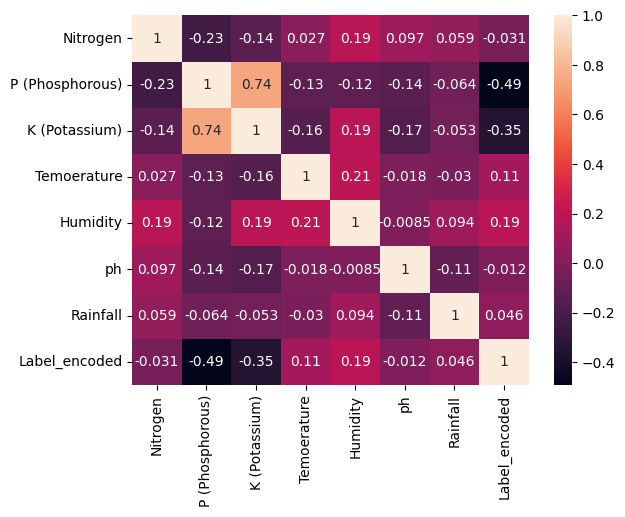

In [13]:
sns.heatmap(crop1.corr(), annot=True, cbar=True)

### Plotting histograms for Nitrogen (N) 

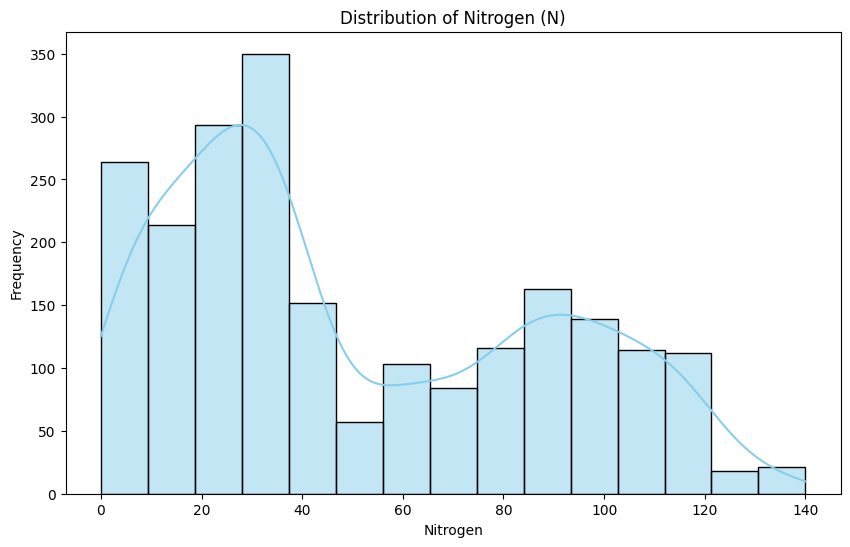

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(crop['Nitrogen'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Nitrogen (N)')
plt.xlabel('Nitrogen')
plt.ylabel('Frequency')
plt.show()

### Plotting histograms for Phosohorous (P)

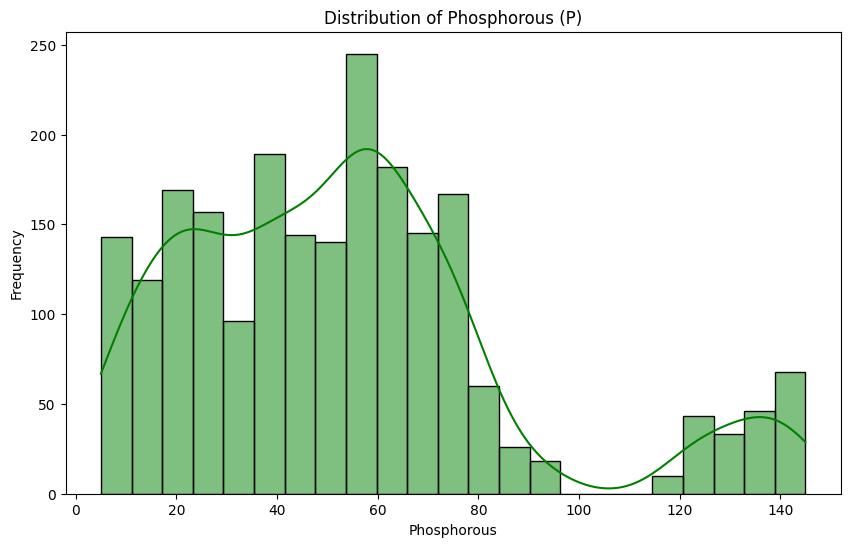

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(crop['P (Phosphorous)'], kde=True, color='green', edgecolor='black')
plt.title('Distribution of Phosphorous (P)')
plt.xlabel('Phosphorous')
plt.ylabel('Frequency')
plt.show()

### Plotting histograms for Potassium (K)

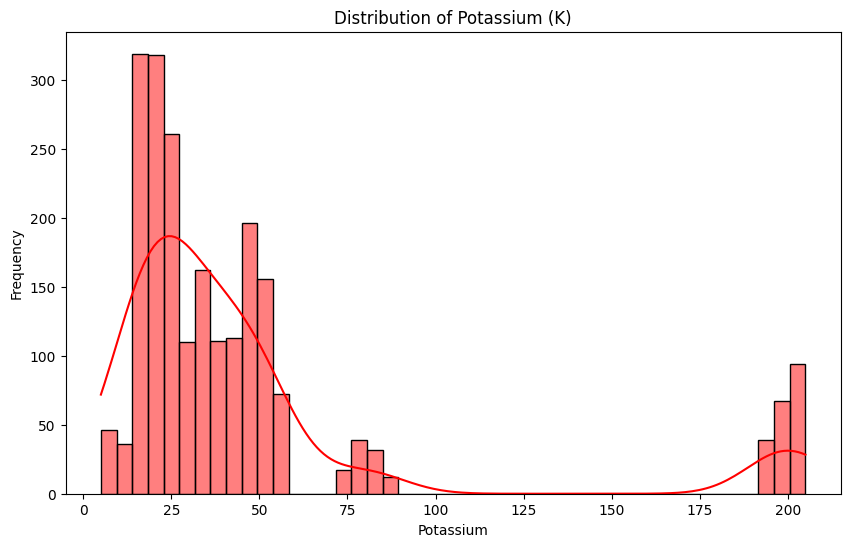

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(crop['K (Potassium)'], kde=True, color='red', edgecolor='black')
plt.title('Distribution of Potassium (K)')
plt.xlabel('Potassium')
plt.ylabel('Frequency')
plt.show()

### Plotting histograms for Temperature

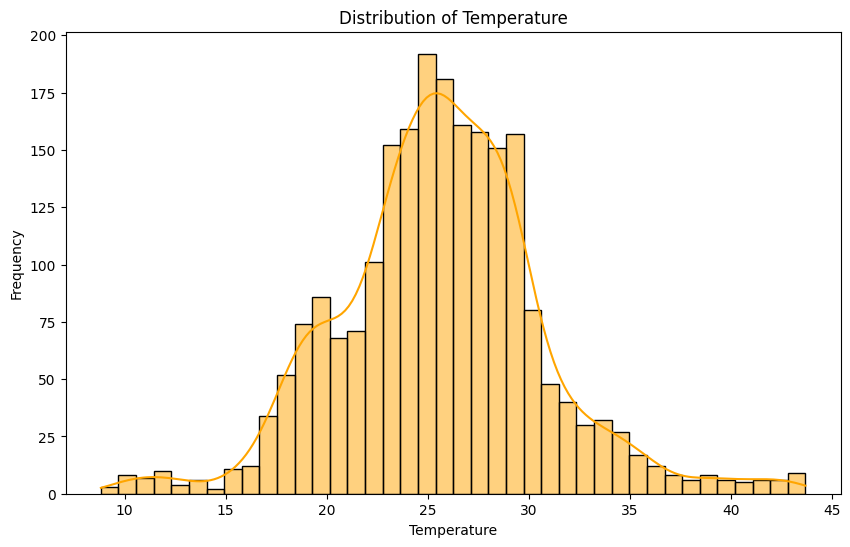

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(crop['Temoerature'], kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

### Plotting histograms for Humidity

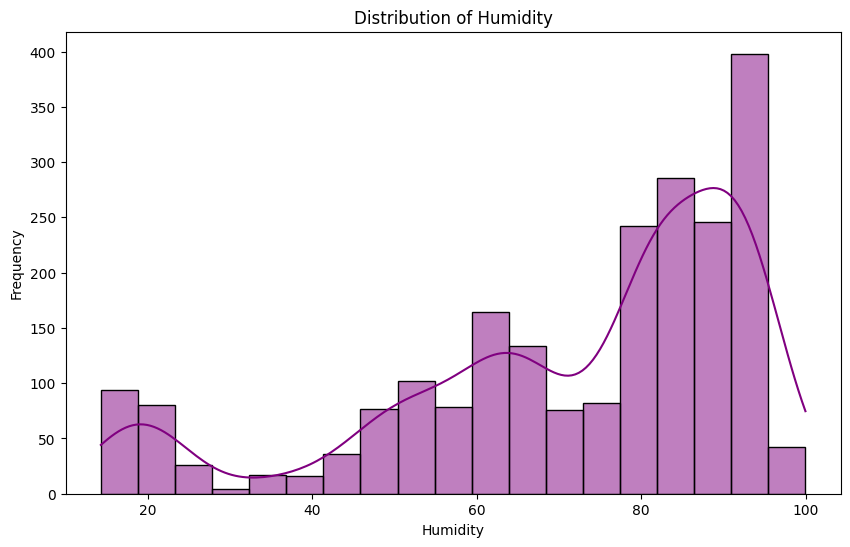

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(crop['Humidity'], kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

### Plotting histograms for pH

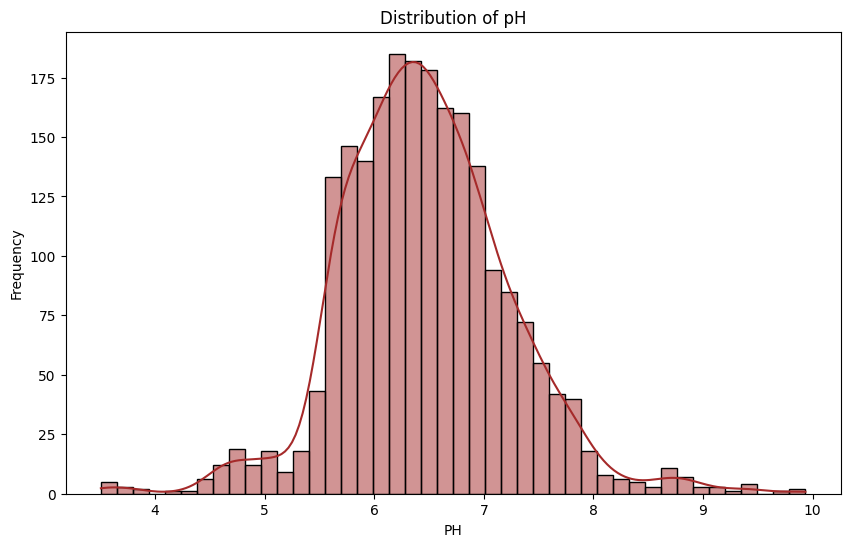

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(crop['ph'], kde=True, color='brown', edgecolor='black')
plt.title('Distribution of pH')
plt.xlabel('PH')
plt.ylabel('Frequency')
plt.show()

### Plotting histograms for Rainfall

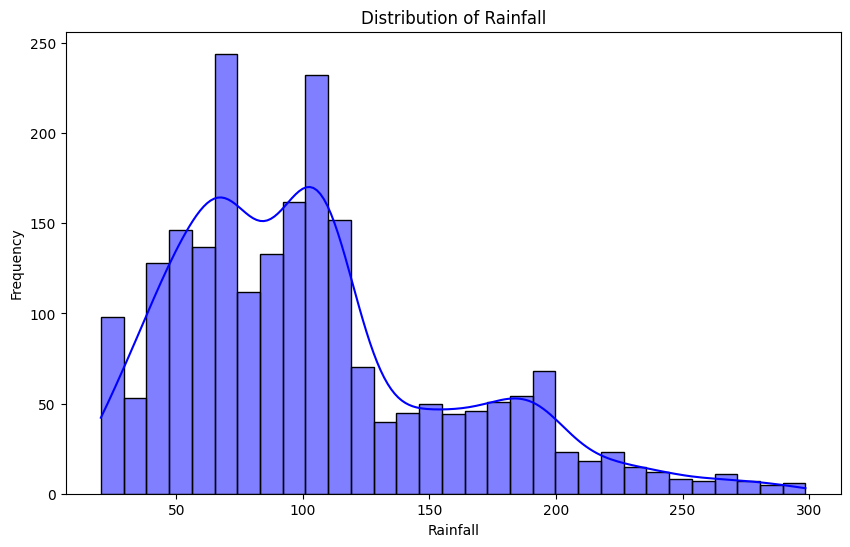

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(crop['Rainfall'], kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

### Plotting histograms for label_encoded


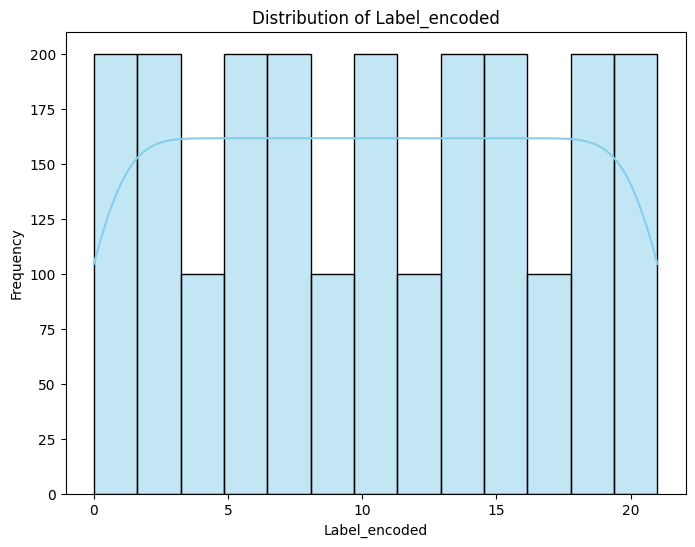

In [21]:
for col in crop.columns:
  if '_encoded' in col:
    plt.figure(figsize=(8, 6))
    sns.histplot(crop[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Create box plots for each feature in crop1

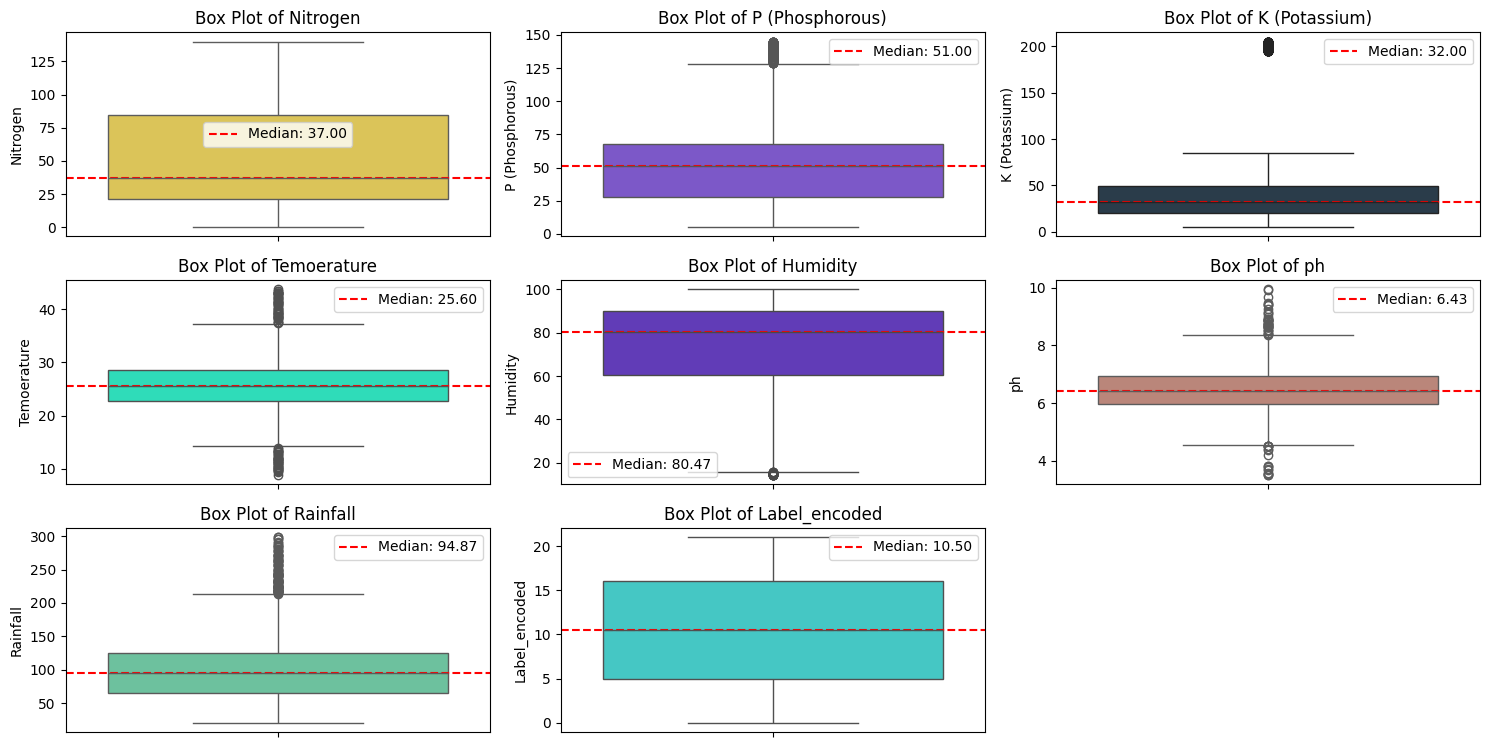

In [22]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(crop1.columns):
    plt.subplot(4, 3, i + 1)  
    sns.boxplot(y=crop1[col], color=np.random.rand(3,)) 
    plt.title(f"Box Plot of {col}") 
    plt.ylabel(col) 

    
    median = crop1[col].median()
    plt.axhline(y=median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    plt.legend() 

plt.tight_layout()
plt.show()

### Pair Plot to visualize relationship between Features

<Figure size 40x20 with 0 Axes>

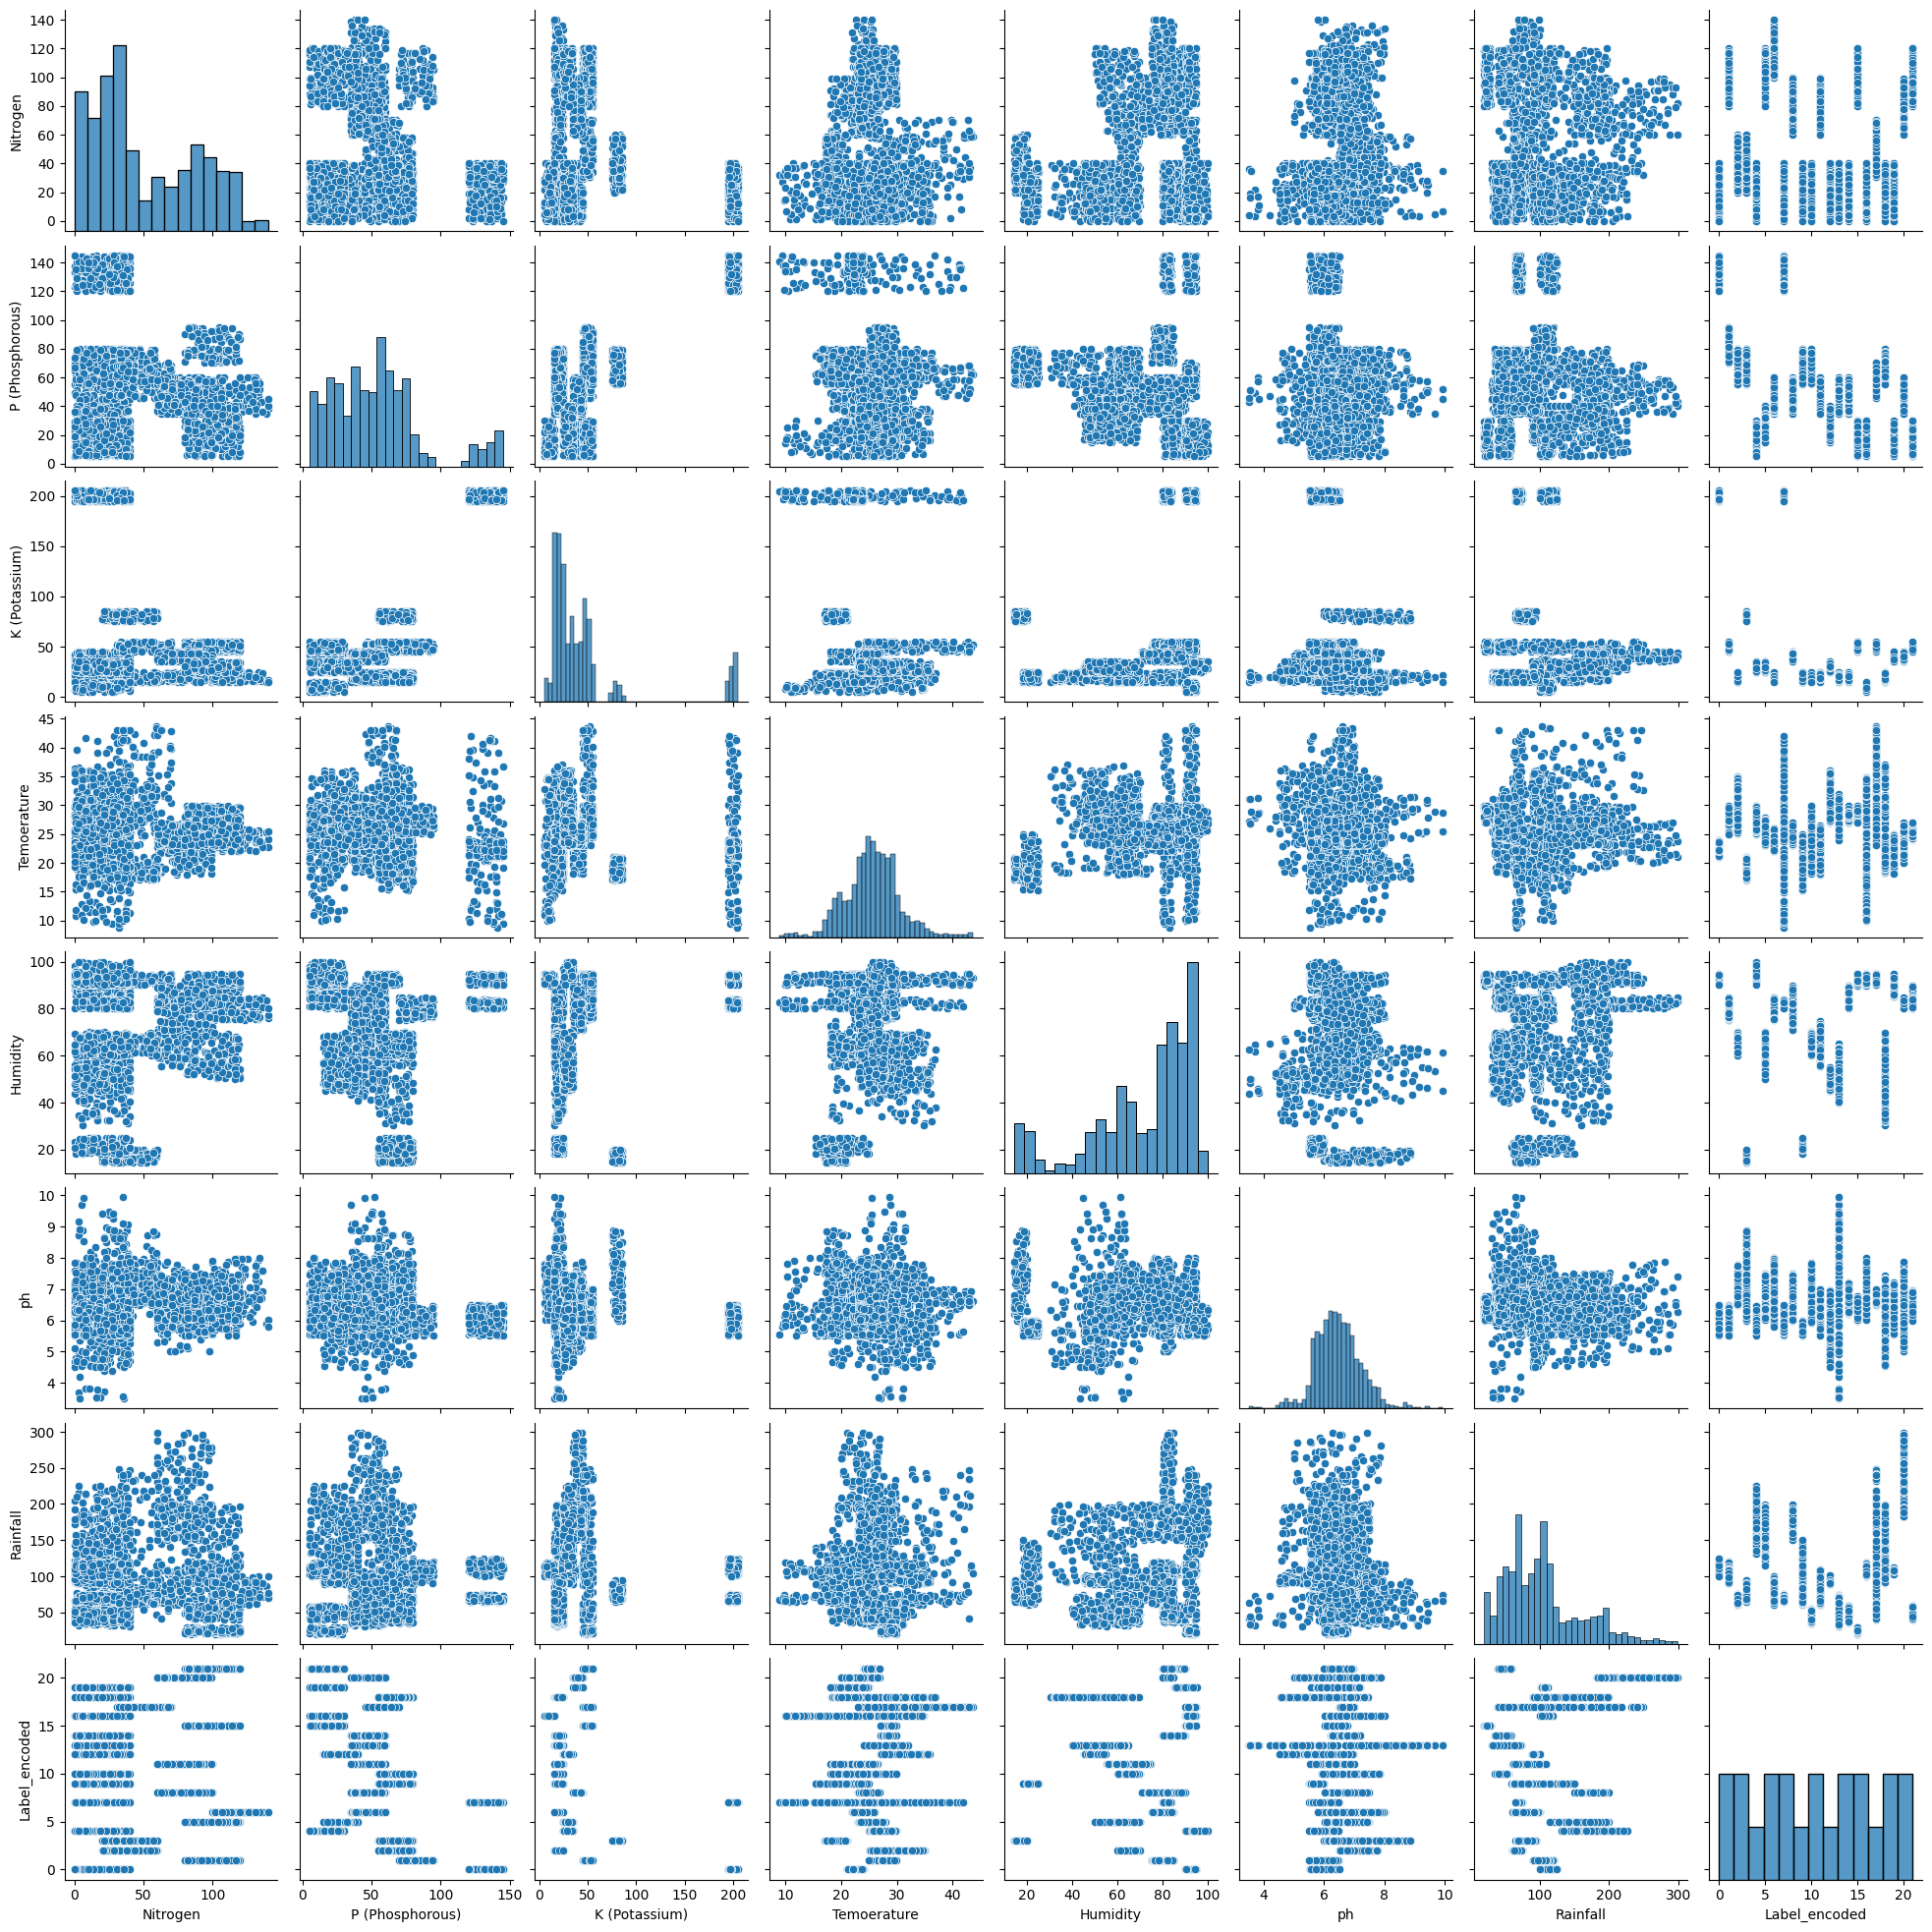

In [23]:
plt.figure(figsize=(.4, .2))
sns.pairplot(crop1)
plt.show()

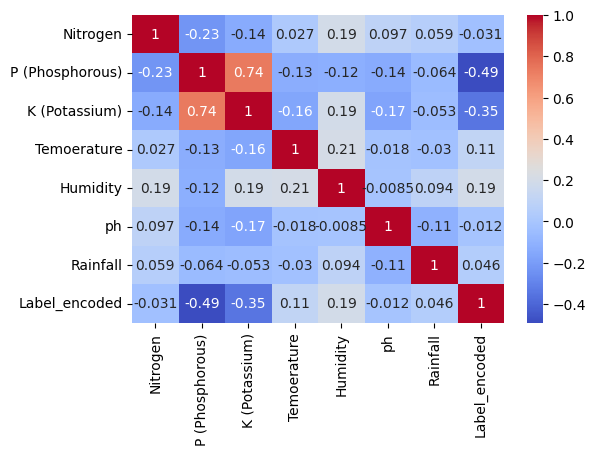

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(crop1.corr(), annot=True, cmap='coolwarm')
plt.show()

### pH Values per Crop

C:\Users\kanis\AppData\Local\Temp\ipykernel_14152\1109842061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Label', y='ph', data=crop, palette='coolwarm')


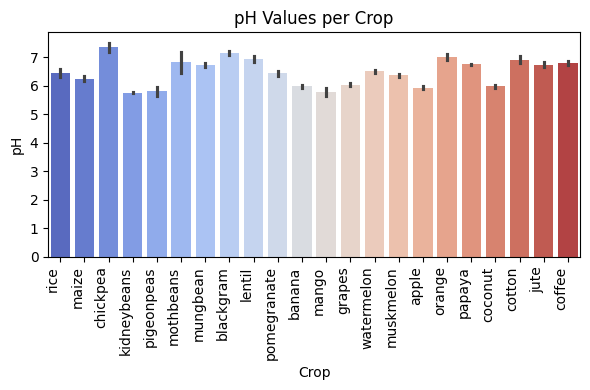

In [25]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Label', y='ph', data=crop, palette='coolwarm')  
plt.title('pH Values per Crop')
plt.xlabel('Crop')
plt.ylabel('pH')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()
plt.show()

### Create it with random soil types

'Soil_Type' column added to the DataFrame.


C:\Users\kanis\AppData\Local\Temp\ipykernel_14152\4255472768.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soil_counts.index, y=soil_counts.values, palette=sns.color_palette("hls", len(soil_counts))) #random colors


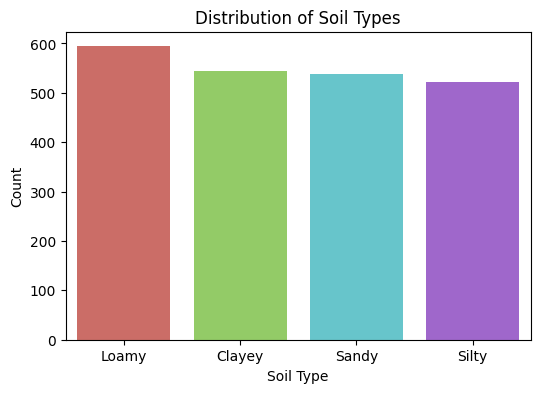

In [26]:
if 'Soil_Type' not in crop.columns:
    soil_types = ['Sandy', 'Clayey', 'Loamy', 'Silty']
    crop['Soil_Type'] = random.choices(soil_types, k=len(crop))
    print("'Soil_Type' column added to the DataFrame.")
else:
    print("'Soil_Type' column already exists.")

# Visualize the distribution of soil types
soil_counts = crop['Soil_Type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=soil_counts.index, y=soil_counts.values, palette=sns.color_palette("hls", len(soil_counts))) #random colors
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.title("Distribution of Soil Types")
plt.show()

### Unique Label Encoding


In [27]:
rop1.Label_encoded.unique()

NameError: name 'rop1' is not defined

In [28]:
X=crop1.drop('Label_encoded', axis = 1)
y=crop1['Label_encoded']
X.head()

,Nitrogen,P (Phosphorous),K (Potassium),Temoerature,Humidity,ph,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


### Data use for train

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train.shape

(1760, 7)

In [30]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    'RandomForestClassifier':RandomForestClassifier(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),

}

### Result Table

In [33]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    results.append([name, score])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy
1,GaussianNB,0.995455
0,RandomForestClassifier,0.993182
3,DecisionTreeClassifier,0.981818
2,SVC,0.968182
4,LogisticRegression,0.963636
5,ExtraTreeClassifier,0.877273


### Check each Model Individual

In [34]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

In [35]:
randclf = GaussianNB()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9954545454545455

In [36]:
randclf = DecisionTreeClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9818181818181818

In [37]:
randclf = SVC()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9681818181818181

In [38]:
randclf = LogisticRegression()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9636363636363636

In [39]:
randclf = ExtraTreeClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9022727272727272

In [40]:
X = crop1.drop('Label_encoded', axis=1)
y = crop1['Label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
}

results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    time_taken = end_time - start_time
    results.append([name, accuracy, balanced_accuracy, f1, time_taken])

results_df = pd.DataFrame(results, columns=
 ['Model', 'Accuracy', 'Balanced Accuracy', 'F1 Score', 'Time Taken'])
results_df

,Model,Accuracy,Balanced Accuracy,F1 Score,Time Taken
0,RandomForestClassifier,0.993182,0.993321,0.993175,0.389335
1,GaussianNB,0.995455,0.995215,0.995423,0.003280
2,SVC,0.968182,0.970014,0.968246,0.064683
3,DecisionTreeClassifier,0.984091,0.985499,0.984089,0.010955
4,LogisticRegression,0.918182,0.927434,0.917196,0.048490
5,ExtraTreeClassifier,0.890909,0.890306,0.891047,0.001820


C:\Users\kanis\AppData\Local\Temp\ipykernel_712\1314049110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=model_names, y=accuracy_scores, palette="coolwarm")


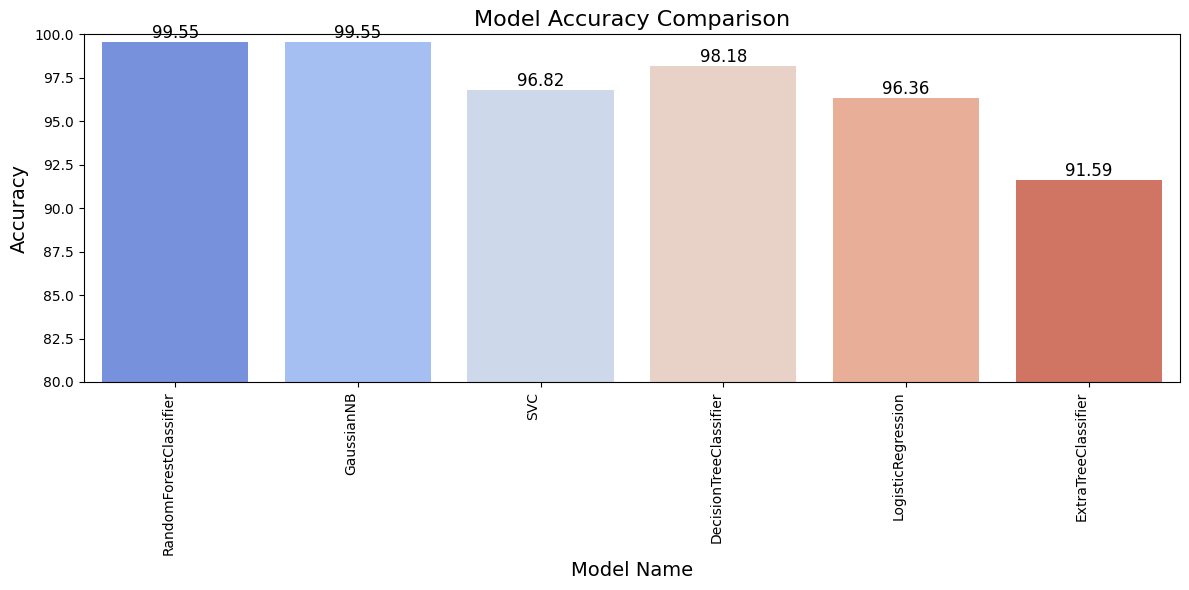

In [41]:
model_names = ['RandomForestClassifier', 'GaussianNB', 'SVC', 'DecisionTreeClassifier', 'LogisticRegression', 'ExtraTreeClassifier']
accuracy_scores = [99.5455, 99.5455, 96.8182, 98.1818, 96.3636, 91.5909]

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=model_names, y=accuracy_scores, palette="coolwarm")


for bar, score in zip(bars.patches, accuracy_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{score:.2f}", ha='center', va='bottom', fontsize=12)


plt.xlabel("Model Name", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xticks(rotation=90, ha='right') 
plt.ylim(80, 100) 
plt.tight_layout()
plt.show()

In [42]:
crop1.columns

Index(['Nitrogen', 'P (Phosphorous)', 'K (Potassium)', 'Temoerature',
       'Humidity', 'ph', 'Rainfall', 'Label_encoded'],
      dtype='object')

In [43]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]
crop1.head()

,Nitrogen,P (Phosphorous),K (Potassium),Temoerature,Humidity,ph,Rainfall,Label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20.0


In [44]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)


y_pred = randclf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy}")

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    transformed_features = mx.transform(features)
    scaled_features = sc.transform(transformed_features)
    prediction = randclf.predict(scaled_features)[0]

    crop_names = crop['Label'].unique()
    label_encoder = LabelEncoder()
    label_encoder.fit(crop_names)  
    predicted_crop_name = label_encoder.inverse_transform([int(prediction)])[0]

    return predicted_crop_name



Random Forest Classifier Accuracy: 0.9931818181818182


# Example usage for Random Forest

In [45]:

N = 0  
P = 59
K = 21
temperature = 25.86
humidity = 61.88
ph = 7.07
rainfall = 36.6

predicted_crop = predict_crop(N, P, K, temperature, humidity, ph, rainfall)
print(f"Predicted crop: {predicted_crop}")

Predicted crop: muskmelon


c:\Users\kanis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [47]:
N = 0  
P = 69
K = 21
temperature = 25.86
humidity = 61.88
ph = 7.07
rainfall = 36.68

predicted_crop = predict_crop(N, P, K, temperature, humidity, ph, rainfall)
print(f"Predicted crop: {predicted_crop}")

Predicted crop: muskmelon


c:\Users\kanis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Crop Recommendation Form

In [63]:

N = 0 #@param {type:"number"}
P = 69 #@param {type:"number"}
K = 21 #@param {type:"number"}
temperature = 25.86 #@param {type:"number"}
humidity = 61.88 #@param {type:"number"}
ph = 7.07 #@param {type:"number"}
rainfall = 36.68 #@param {type:"number"}

predicted_crop = predict_crop(N, P, K, temperature, humidity, ph, rainfall)
print(f"Predicted crop: {predicted_crop}")

Predicted crop: muskmelon


c:\Users\kanis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [68]:
N = 20
P = 72
K = 15
temperature = 36
humidity = 56
ph = 7
rainfall = 134

predicted_crop = predict_crop(N, P, K, temperature, humidity, ph, rainfall)
print(f"Predicted crop: {predicted_crop}")

Predicted crop: kidneybeans


c:\Users\kanis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [49]:
import pickle

pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standardscaler.pkl', 'wb'))